In [38]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import itertools

plt.style.use('./informes.mplstyle')

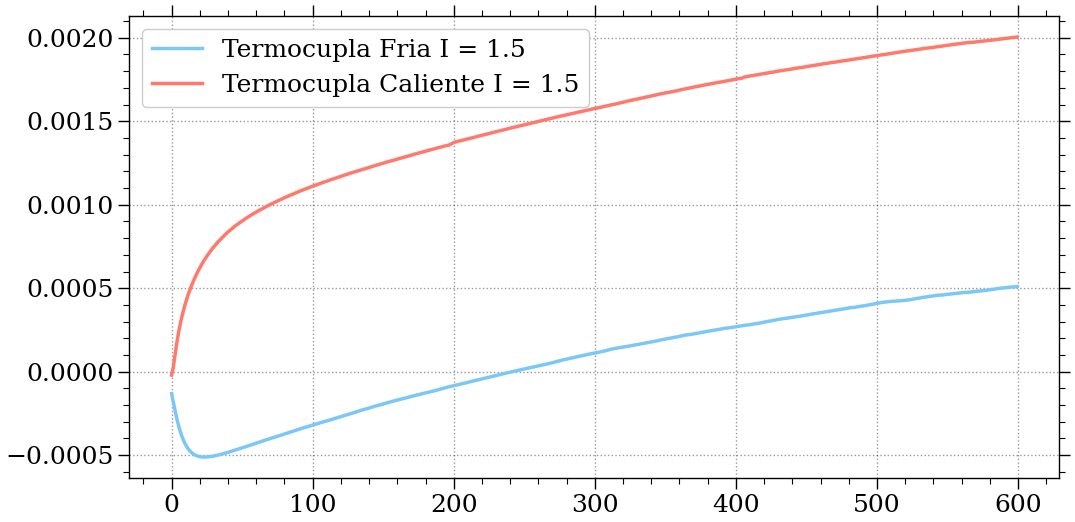

In [39]:
df = pd.read_csv(f'Mediciones/Clase 3/celda_tvsV_I=1.5.csv')
t       =   df['Tiempo [s]'].values
v       =   df['Tension generador [V]'].values
tf =   df['Tensión termocupla fria [V]'].values
tc =   df['Tensión termocupla caliente [V]'].values
delta_t = tc-tf
fig, ax = plt.subplots()

ax.plot(t,tf,label = f'Termocupla Fria I = {1.5}', color = 'C1')
ax.plot(t,tc, label = f'Termocupla Caliente I = {1.5}', color = 'C3')
ax.legend() 

En 9 minutos 20 segundos, la difrencia de termperatura fue 0.000063 °C


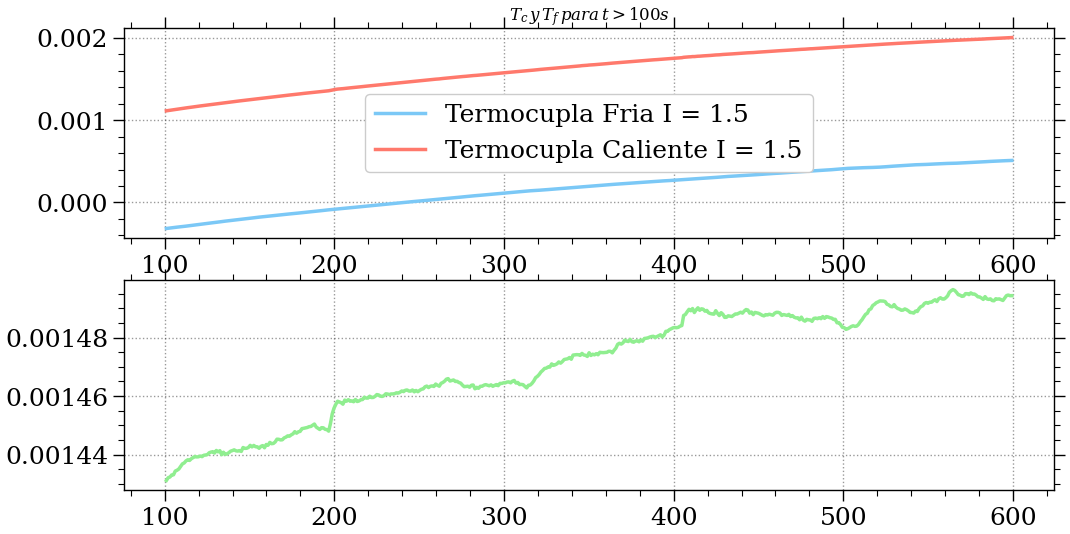

In [40]:
d2      =   df[df['Tiempo [s]']>100]
t_100       =   d2['Tiempo [s]'].values
v_100       =   d2['Tension generador [V]'].values
tf_100 =   d2['Tensión termocupla fria [V]'].values
tc_100 =   d2['Tensión termocupla caliente [V]'].values

fig, ax = plt.subplots(2,1)
ax[0].plot(t_100,tf_100,label = f'Termocupla Fria I = {1.5}', color = 'C1')
ax[0].plot(t_100,tc_100, label = f'Termocupla Caliente I = {1.5}', color = 'C3')
ax[0].legend() 
ax[0].set_title(f'$T_c \, y\, T_f \, para \, t>100s$')
ax[1].plot(t_100,tc_100-tf_100,label = f'$\Delta T$')
print(f'En 9 minutos 20 segundos, la difrencia de termperatura fue {((tc_100[-1]-tf_100[-1])-(tc_100[0]-tf_100[0])):.6f} °C')

Text(0, 0.5, 'Temperatura [°C]')

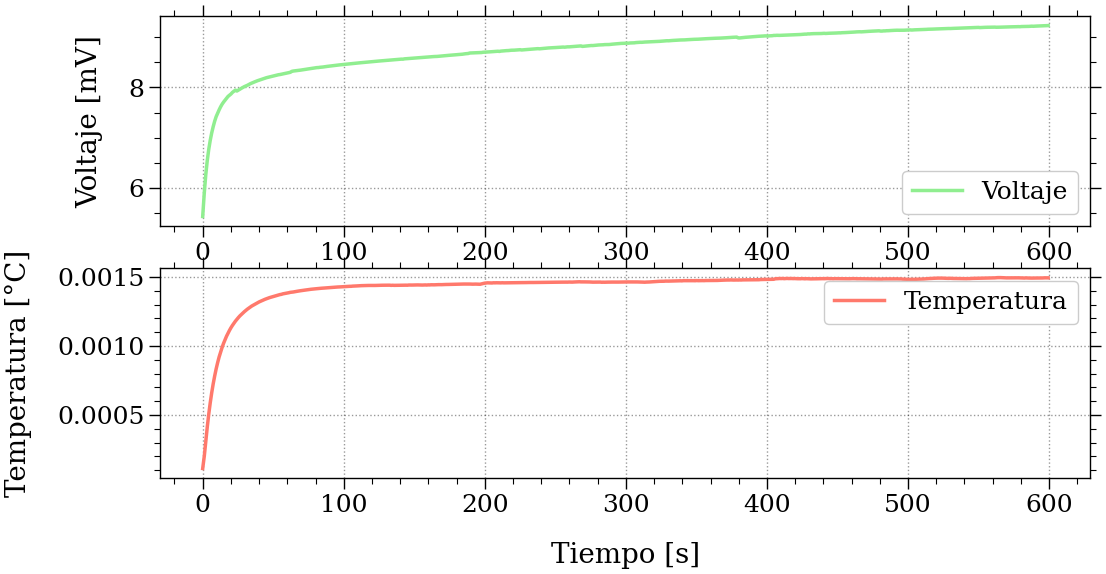

In [41]:
fig, ax = plt.subplots(2,1)

ax[0].plot(t,v,label = f'Voltaje')
ax[0].legend()
ax[0].set_xlabel('Tiempo [s]')
ax[0].set_ylabel('Voltaje [mV]')
ax[1].plot(t,delta_t,label = f'Temperatura',color = 'C3')
ax[1].legend()
ax[1].set_xlabel('Tiempo [s]')
ax[1].set_ylabel('Temperatura [°C]')


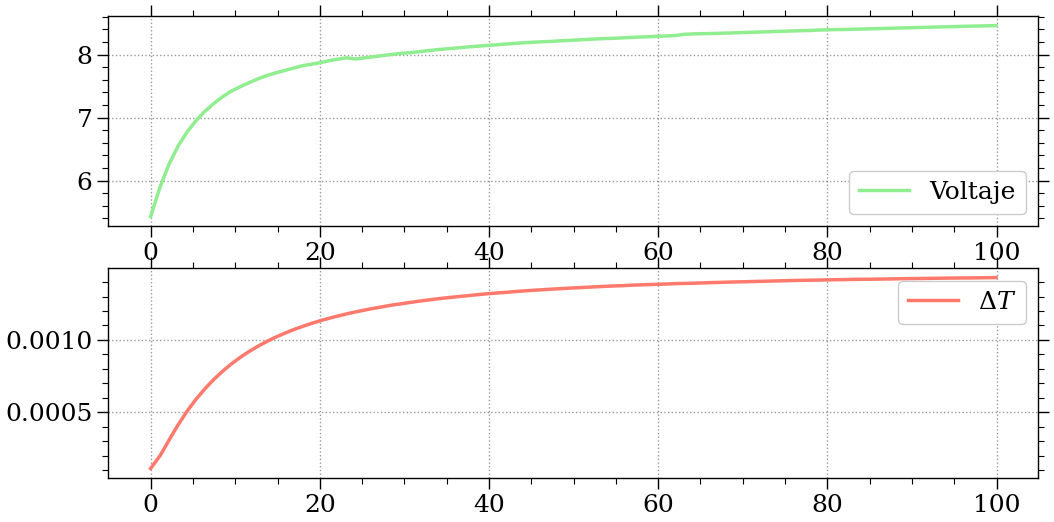

In [42]:
d3       =   df[df['Tiempo [s]']<100]
t_3      =   d3['Tiempo [s]'].values
v_3      =   d3['Tension generador [V]'].values
tf_3 =   d3['Tensión termocupla fria [V]'].values
tc_3 =  d3['Tensión termocupla caliente [V]'].values
delta_t3 = tc_3 - tf_3

fig, ax = plt.subplots(2,1)

ax[0].plot(t_3,v_3,label = f'Voltaje')
ax[0].legend()
ax[1].plot(t_3,delta_t3,label = f'$\Delta T$',color = 'C3')
ax[1].legend()

[ 0.00051736 -0.00292329]
[[ 5.51783734e-11 -4.43540529e-10]
 [-4.43540529e-10  3.58186715e-09]]
[7.42821468e-06 5.98487022e-05]


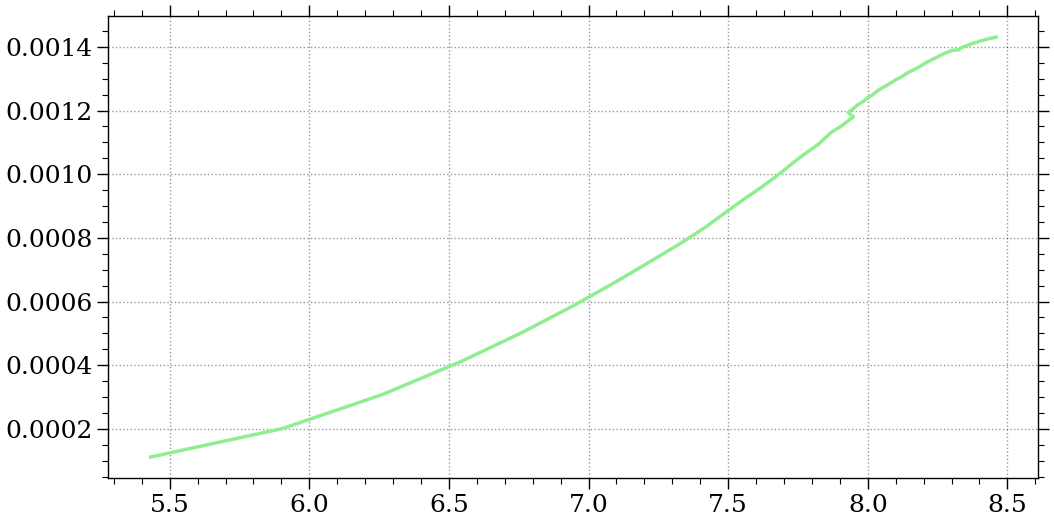

In [46]:
fig, ax = plt.subplots()
ax.plot(v_3,delta_t3)

def lineal(V,a,b):
    return a*V + b

popt, pcov = curve_fit(lineal,v_3,delta_t3)
print(popt)
print(pcov)
print(np.sqrt(np.diag(pcov)))